# Ploting some figures for the Article

In particular:
1. SEE models
2. Parametric study of $\phi$, $T_e$, $\sigma$
3. EVDF compared to Maxwellian

## Importing stuffs

In [18]:
#imports libs and data
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pickle, json

from scipy.ndimage.filters import gaussian_filter1d as smooth

import LPPview.Classes as Classes
import LPPview.Classes.LPPic_fields as fl
import LPPview.Classes.LPPic as LP
import LPPview.Classes.LPPic_newwalls as nw
from functions import (simpleplot, ne_Bolz, Te_eff_calcl, phi_drop,
                        sigma_maxw_unsat,
                        sigma_maxw_sat,
                        newSigma_maxw,maxwE)

import matplotlib as mpl
import matplotlib.pyplot as plt

qe = 1.6021766E-19
me =  9.109E-31 
mi = 219.6E-27
eps0 = 8.854187817e-12

#run = pickle.load( open( "save_run.p", "rb" ) )
data_all = pickle.load( open( "save_data_all.p", "rb" ) )
PIC = pickle.load( open( "PICvalues.dat", "rb" ) )
savepath = "../"

sigma_0 = 0.5
sigma_max= 2.9

In [11]:
def is_main_module():
    """
    Returns whether this notebook is the main module
    ie not being run from another notebook
    """
    return __name__ == '__main__' and '__file__' not in globals()

In [12]:
Paper_style = json.load(open("Paperstyle.json",'r'))
mpl.style.use(Paper_style)

In [20]:
#plot functions
def subs(Nsub = 1):
    
    fig, axarr = plt.subplots(1,Nsub,figsize = (Nsub*4,3))

    if Nsub == 1:
        axarr = [axarr]
        
    return fig, axarr

def axLabels(ax,title,xlabel,ylabel):
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

In [21]:
# extract data 
indices = np.argsort( PIC["epsilon"])
PIC_eps, PIC_Te , PIC_sig, PIC_phi = [PIC[s][indices] for s in ["epsilon", "Te", "sigma",'Phi']]
PIC_Te *= 1
N_pic = len(PIC_eps)

# Parametric plots

In [22]:
from scipy.interpolate import UnivariateSpline as spl

def scatter(ax,X, Y, **kwarg):
    """ do a scatter plot of the data AND add a fiiting curv on it"""
    
    index = np.argsort(X)
    Xprim = X[index]
    Yprim = Y[index]
    
    scat = ax.scatter(Xprim,Yprim,**kwarg)
    #plot lines between the points
    ax.plot(Xprim,Yprim,"--",linewidth=1.5, alpha = 0.5, )
    
    #Try to fit with a sline curve
    #fit = spl(X,Y*100,k = 1)
    #fit.set_smoothing_factor(15)
    #xs = np.linspace(X.min(), X.max(), 50)
    
    #ax.plot(xs, fit(xs)/100)
    

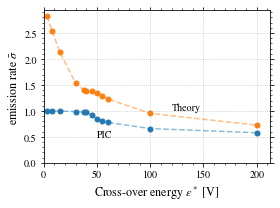

In [25]:
#"plot Sigma"
def plot_sig1():
    fig, axarr = subs(1)
    ax = axarr[0]

    scatter(ax,PIC_eps,PIC_sig, label = "PIC diagnostic")
    scatter(ax,PIC_eps,sigma_maxw_sat(PIC_Te,PIC_eps), label = r"with $ T_{e,\rm bulk}$")

    #ax.scatter([ 200., 50.,  10.],  #400.,
    #[0.532,0.7243,0.9937], label = r"with $ T_{e,\rm wall}$")  #0.5061,

    title = "" #"SEE rate PIC vs model"
    xlabel = "Cross-over energy $\epsilon^*$ [V] "
    ylabel = r"emission rate $\bar{\sigma}$ "

    axLabels(ax,title,xlabel,ylabel)

    ax.text(120,1.01,r"Theory", fontsize = 10)
    ax.text(50,0.5,r"PIC", fontsize = 10)
    ax.legend_.remove()

    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0)
    
plot_sig1()
plt.savefig(savepath+"SEE_rates.pdf")

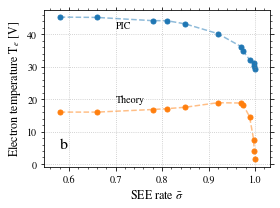

In [48]:
#"plot Te from PIC"
def plot_Te1():
    fig, axarr = subs(Nsub = 1)

    ax = axarr[0]
    absic = np.log((1- PIC_sig )*np.sqrt(mi/(2*np.pi*me)))
    absic = PIC_sig
    scatter(ax,absic, PIC_Te, label = "PIC diagnostic")
    
    scatter(ax,absic, Te_eff_calcl(PIC_sig,PIC_eps),
            label = r"effective from $\sigma_{\rm PIC}$")

    # ax.plot(PIC_sig[:int(N_pic/1.1)], PIC_eps[:int(N_pic/1.1)]/2, ':',
    #         label = "$\epsilon^*/2$",
    #        linewidth = 2, alpha = 0.7,
    #        zorder = 0)



    title = "" #"PIC and effective $T_e$"
    ylabel = "Electron temperature T$_e$ [V]"
    xlabel =  "SEE rate $\\bar{\sigma} $"
    axLabels(ax,title,xlabel,ylabel)
    #ax.set_ylim(ymin = 25, ymax=50)
    #ax.set_xlim(xmin = 0)

    ax.text(0.7,19,r"Theory", fontsize = 10)
    ax.text(0.58,5,r"b", fontsize = 16)
    ax.text(0.7,42,r"PIC", fontsize = 10)
    ax.legend_.remove()

plot_Te1()
plt.savefig(savepath+"Te_pic_2")

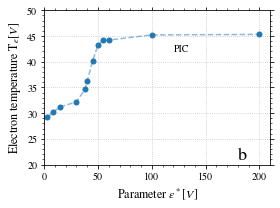

In [28]:
#"plot Te from PIC"
def plot_Te2():
    fig, axarr = subs(Nsub = 1)

    ax = axarr[0]
    scatter(ax,PIC_eps, PIC_Te, label = "PIC diagnostic")
    #scatter(ax,PIC_eps, Te_eff_calcl(PIC_sig,PIC_eps),
    #        label = r"effective from $\sigma_{\rm PIC}$")

    #ax.plot(PIC_eps[:int(N_pic/1.1)], PIC_eps[:int(N_pic/1.1)]/2, ':',
    #        #label = "$\epsilon^*/2$",
    #       linewidth = 2, alpha = 0.7,
    #       zorder = 0)



    title = "" #"PIC and effective $T_e$"
    ylabel = "Electron temperature T$_e [V]$"
    xlabel = "Parameter $\epsilon^* [V]$"
    axLabels(ax,title,xlabel,ylabel)
    ax.set_ylim(ymin = 20, ymax=50)
    ax.set_xlim(xmin = 0)

    #ax.text(120,19,r"Theory", fontsize = 10)
    ax.text(120,42,r"PIC", fontsize = 10)
    ax.legend_.remove()
    ax.text(180, 21, r"b", fontsize=18)

plot_Te2()
plt.savefig(savepath+"Te_pic")

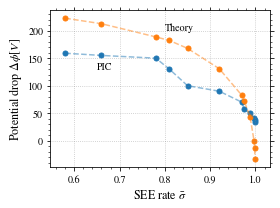

In [29]:
#plot Phi 2
def plot_phi1():
    fig, axarr = subs(Nsub = 1)

    ax = axarr[0]  
    absic = np.log((1- PIC_sig )*np.sqrt(mi/(2*np.pi*me)))
    absic = PIC_sig
    scatter(ax,absic, PIC_phi, label = "PIC")
    scatter(ax,absic, phi_drop(PIC_Te, PIC_sig), label = "theoretical")


    title = ""# " PIC and theorycal $\Delta \phi$"
    ylabel = r"Potential drop $\Delta \phi [V] $"
    xlabel =  "SEE rate $\\bar{\sigma} $"

    axLabels(ax,title,xlabel,ylabel)

    ax.text(0.8,200,r"Theory", fontsize = 10)
    ax.text(0.65,130,r"PIC", fontsize = 10)
    ax.legend_.remove()

    #ax.set_xlim(xmin = 0)

plot_phi1()
plt.savefig(savepath+"phi_drop_2")



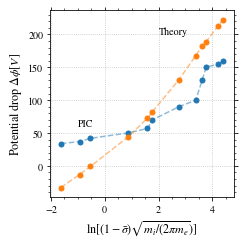

In [25]:
#plot Phi 3
def plot_phi2():
    fig, axarr = subs(Nsub = 1)

    ax = axarr[0]  
    absic = np.log((1- PIC_sig )*np.sqrt(mi/(2*np.pi*me)))

    scatter(ax,absic, PIC_phi, label = "PIC")
    scatter(ax,absic, phi_drop(PIC_Te, PIC_sig), label = "theoretical")


    title = ""# " PIC and theorycal $\Delta \phi$"
    ylabel = r"Potential drop $\Delta \phi [V] $"
    xlabel =  r"$\ln[(1 - \bar{\sigma})\sqrt{m_i/(2 \pi m_e})] $"

    axLabels(ax,title,xlabel,ylabel)

    ax.text(2,200,r"Theory", fontsize = 10)
    ax.text(-1,60,r"PIC", fontsize = 10)
    ax.legend_.remove()

#ax.set_xlim(xmin = 0)
if is_main_module():
    plot_phi2()
    plt.savefig(savepath+"phi_drop_3")



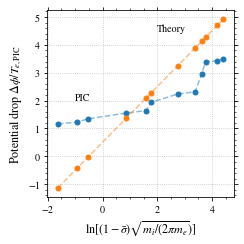

In [26]:
#plot Phi 3
def plot_phi3():
    fig, axarr = subs(Nsub = 1)

    ax = axarr[0]  
    absic = np.log((1- PIC_sig )*np.sqrt(mi/(2*np.pi*me)))

    scatter(ax,absic, PIC_phi/PIC_Te, label = "PIC")
    scatter(ax,absic, phi_drop(PIC_Te, PIC_sig)/PIC_Te, label = "theoretical")


    title = ""# " PIC and theorycal $\Delta \phi$"
    ylabel = r"Potential drop $\Delta \phi / T_{e,\rm PIC}  $"
    xlabel =  r"$\ln[(1 - \bar{\sigma})\sqrt{m_i/(2 \pi m_e})] $"

    axLabels(ax,title,xlabel,ylabel)

    ax.text(2,4.5,r"Theory", fontsize = 10)
    ax.text(-1,2,r"PIC", fontsize = 10)
    ax.legend_.remove()

    #ax.set_xlim(xmin = 0)

if is_main_module():
    plot_phi3()
    plt.savefig(savepath+"phi_drop_3")



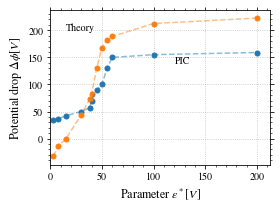

In [30]:
#plot Phi
def plot_phi4():
    fig, axarr = subs(Nsub = 1)

    ax = axarr[0]    
    scatter(ax,PIC_eps, PIC_phi, label = "PIC")
    scatter(ax,PIC_eps, phi_drop(PIC_Te, PIC_sig), label = "theoretical")


    title = ""# " PIC and theorycal $\Delta \phi$"
    ylabel = r"Potential drop $\Delta \phi [V] $"
    xlabel =  "Parameter $\epsilon^* [V]$"

    axLabels(ax,title,xlabel,ylabel)

    ax.text(15,200,r"Theory", fontsize = 10)
    ax.text(120,140,r"PIC", fontsize = 10)
    ax.legend_.remove()

    ax.set_xlim(xmin = 0)

plot_phi4()
plt.savefig(savepath+"phi_drop")



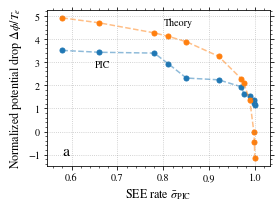

In [35]:
#plot Phi 2
def plot_phi5():
    fig, axarr = subs(Nsub = 1)

    ax = axarr[0]  
    absic = np.log((1- PIC_sig )*np.sqrt(mi/(2*np.pi*me)))
    absic = PIC_sig
    scatter(ax,absic, PIC_phi/PIC_Te, label = "PIC")
    scatter(ax,absic, phi_drop(PIC_Te, PIC_sig)/PIC_Te, label = "theoretical")


    title = ""# " PIC and theorycal $\Delta \phi$"
    ylabel = r"Normalized potential drop $\Delta \phi /T_e $"
    xlabel =  "SEE rate $\\bar{\sigma}_{\\rm PIC} $"

    axLabels(ax,title,xlabel,ylabel)

    ax.text(0.8,4.6,r"Theory", fontsize = 10)
    ax.text(0.65,2.8,r"PIC", fontsize = 10)
    ax.text(0.58,-1,r"a",fontsize=16)
    ax.legend_.remove()

    #ax.set_xlim(xmin = 0)


plot_phi5()
plt.savefig(savepath+"phi_drop_6")



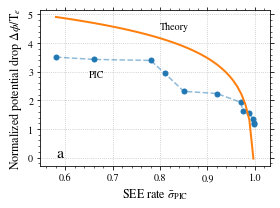

In [41]:
#plot Phi 2
def plot_phi5():
    fig, axarr = subs(Nsub = 1)

    ax = axarr[0]  
    absic = PIC_sig
    scatter(ax,absic, PIC_phi/PIC_Te, label = "PIC")
    
    sig = np.linspace(0.58, 0.997)
    phi = np.log((1- sig )*np.sqrt(mi/(2*np.pi*me))) + 0.5
    
    ax.plot(sig, phi)
    #scatter(ax,sig, phi, label = "theoretical")


    title = ""# " PIC and theorycal $\Delta \phi$"
    ylabel = r"Normalized potential drop $\Delta \phi /$T$_e $"
    xlabel =  "SEE rate $\\bar{\sigma}_{\\rm PIC} $"

    axLabels(ax,title,xlabel,ylabel)

    ax.text(0.8,4.5,r"Theory", fontsize = 10)
    ax.text(0.65,2.8,r"PIC", fontsize = 10)
    ax.text(0.58,0,r"a",fontsize=16)
    ax.legend_.remove()

    #ax.set_xlim(xmin = 0)


plot_phi5()
plt.savefig(savepath+"phi_drop_6")



# EVDF From PIC

In [12]:
data = pickle.load(open("bulk_EVDF.dat","rb"))
data_sh = pickle.load(open("sheath_EVDF.dat","rb"))

epstar = 200
epsToPlot = str(epstar)

In [13]:
evect = [200, 50, 25, 10]
ratevect = [0,0,0,0]

In [14]:
for i,e in enumerate(evect):
    epsToPlot = str(e)
    
    vtab, vx, vy, vz = [data_sh[s][epsToPlot] for s in ["vtab",'vx','vy','vz']]
    vtab = (vtab[1:] + vtab[:-1])/2
    etab = vtab**2 *me/2/qe

    sig = etab/e* ( 0.5) + 0.5
    sig[sig > 2.9] = 2.9

    mask = np.ones(len(vtab), dtype="bool")
    mask = vtab > 0.0
    ratevect[i] = np.sum(sig[mask]*abs(vtab[mask])*vy[mask]) + np.sum(sig[mask]*vx[mask]) + np.sum(sig[mask]*vz[mask])
    ratevect[i] /= np.sum(abs(vtab[mask])*vy[mask])

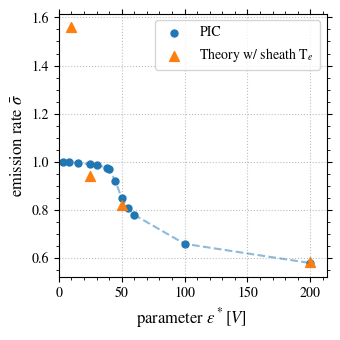

In [15]:
#"plot Sigma"
fig, axarr = subs(1)
ax = axarr[0]

scatter(ax,np.append(PIC_eps,25),np.append(PIC_sig,0.99), label = "PIC")

#!scatter(ax,PIC_eps,sigma_maxw_sat(PIC_Te,PIC_eps), label = r"with $ T_{e,\rm bulk}$")
ax.scatter(evect,ratevect, marker="^", s=50, label = "Theory w/ sheath T$_e$")

#ax.scatter([ 200., 50.,  10.],  #400.,
#[0.532,0.7243,0.9937], label = r"with $ T_{e,\rm wall}$")  #0.5061,

title = "" #"SEE rate PIC vs model"
xlabel = "parameter $\epsilon^* [V]$ "
ylabel = r"emission rate $\bar{\sigma}$ "

axLabels(ax,title,xlabel,ylabel)


# ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.savefig(savepath+"SEE_rates_withEEDF")

In [95]:
for i,e in enumerate(evect):
    epsToPlot = str(e)
    
    vtab, vx, vy, vz = [data_sh[s][epsToPlot] for s in ["vtab",'vx','vy','vz']]
    vtab = (vtab[1:] + vtab[:-1])/2
    etab = vtab**2 *me/2/qe
    Te = sum((vx*(vtab - (vtab*vx).sum())**2 + vy *(vtab - (vtab*vy).sum())**2 + vz*(vtab - (vtab*vz).sum())**2)*me/2/qe) / sum(vx + vy + vz)
    print(e,Te)
    Te = sum((vx*(vtab )**2 + vy *(vtab)**2 + vz*(vtab )**2)*me/2/qe) / sum(vx + vy + vz)
    print(e,Te)
    sig = 2*Te/e* ( 0.5) + 0.5
    
    ratevect[i] = sig

200 20.28371237288812
200 20.28373651701244
50 18.905718301458567
50 18.90574110492038
25 13.242808345633925
25 13.24282887284645
10 11.908052232400024
10 11.908069795942817
